In [32]:
import pandas as pd 
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


In [89]:
X_train = pd.read_parquet("X_train_ethereum.parquet")
y_train = pd.read_parquet("y_train_ethereum.parquet")
X_test = pd.read_parquet("X_test_ethereum.parquet")
y_test = pd.read_parquet("y_test_ethereum.parquet")


In [90]:
X_train = X_train.bfill()
y_train = y_train.dropna()


['price', 'open', 'high', 'low', 'volume_log']


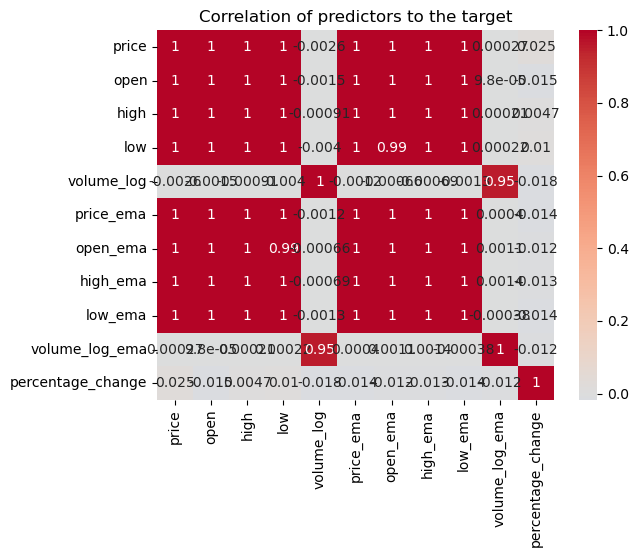

In [91]:
# plot relationships between predictors and target 
not_ema_features = [x for x in X_train.columns if '_ema' not in x]
print(not_ema_features)
# X_train = X_train[not_ema_features]
# X_test = X_test[not_ema_features]

train_df = X_train.join(y_train)
correlation_matrix = train_df.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation of predictors to the target")
plt.show()

In [93]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Create PolynomialFeatures object to generate polynomial features
poly_features = PolynomialFeatures(degree=1)

# Transform the training features to polynomial features
X_poly_train = poly_features.fit_transform(X_train)

# Fit a linear regression model on the polynomial features
lin_reg = LinearRegression()
lin_reg.fit(X_poly_train, y_train)

# Transform the test features to polynomial features
X_poly_test = poly_features.transform(X_test)

# Predict using the trained model
y_pred = lin_reg.predict(X_poly_test)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)

# Print the coefficients and intercept of the polynomial regression model
print("Intercept: ", lin_reg.intercept_)
print("Coefficients: ", lin_reg.coef_)
print("Coefficient of determination (R-squared): ", r2)


Intercept:  [1.01775189]
Coefficients:  [[ 0.          0.05012262  0.08413985  0.01532907 -0.00372339  0.03431818
  -0.21168876  0.05214863  0.00646266  0.00629915 -0.07444203]]
Coefficient of determination (R-squared):  0.631017510761994
